In [81]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

train_airbnb_df = pd.read_csv("/Users/cha/Desktop/3A/code/ml-project/data/train_airbnb_berlin.csv")
train_airbnb_df_c = pd.read_csv("/Users/cha/Desktop/3A/code/ml-project/data/train_airbnb_berlin_cleaned.csv")


### Box plot for features before scaling

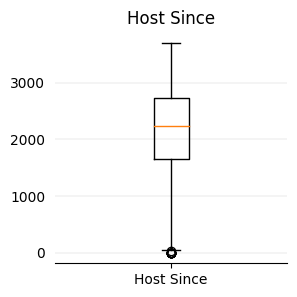

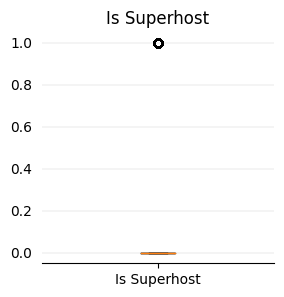

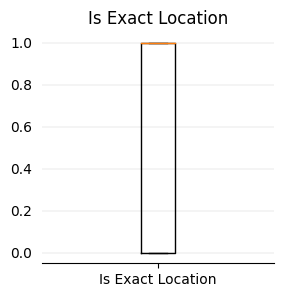

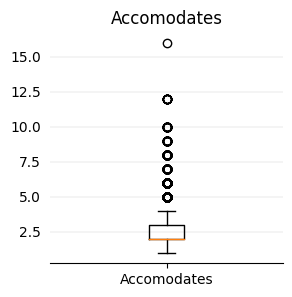

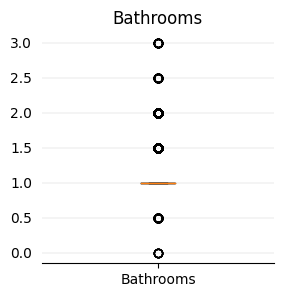

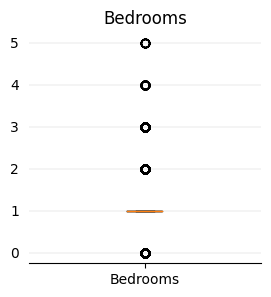

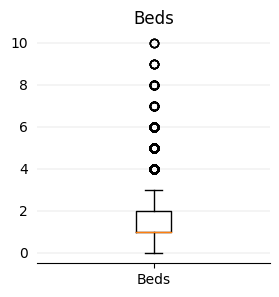

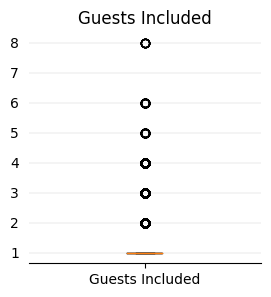

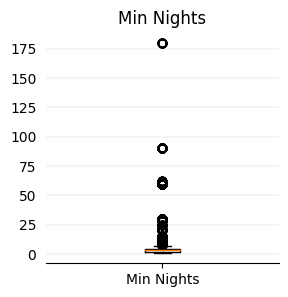

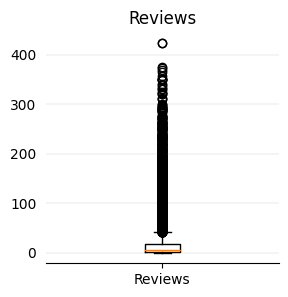

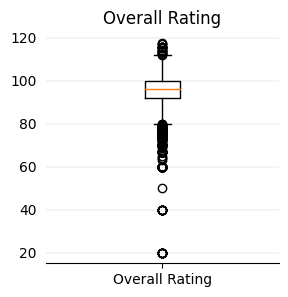

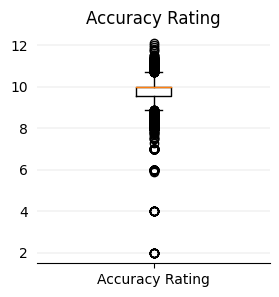

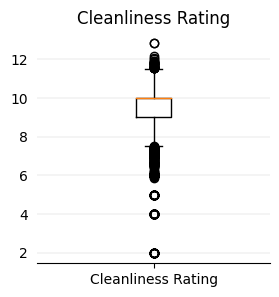

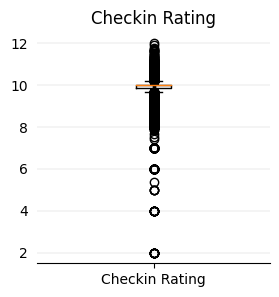

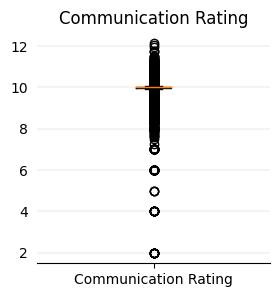

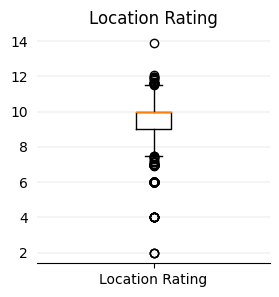

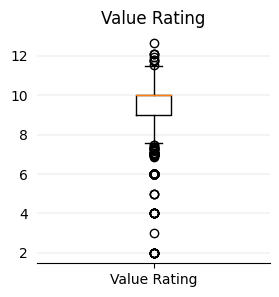

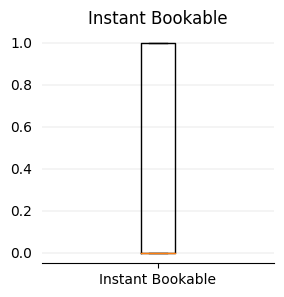

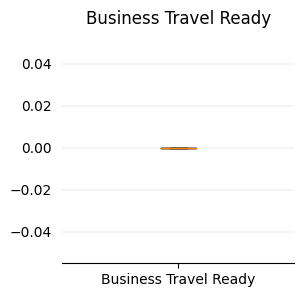

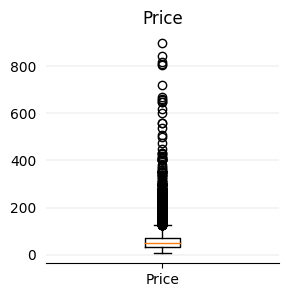

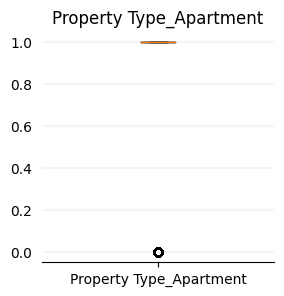

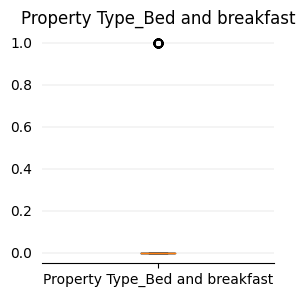

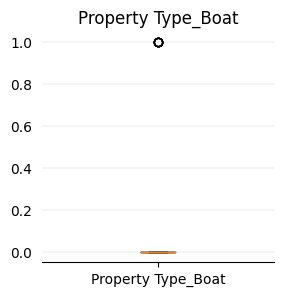

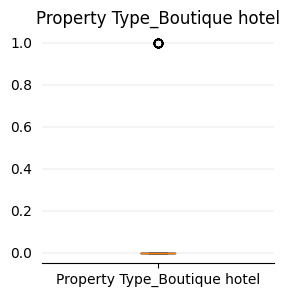

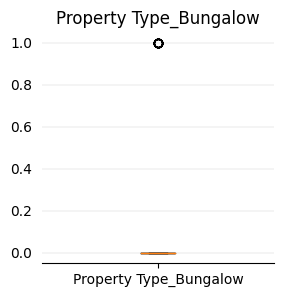

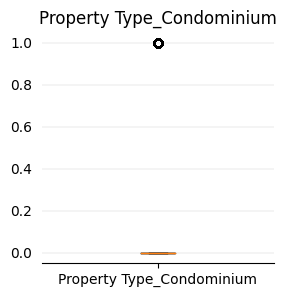

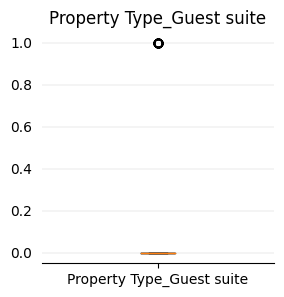

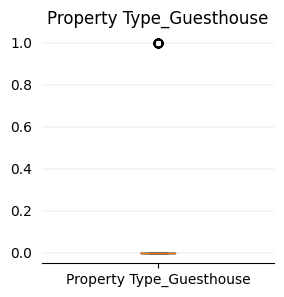

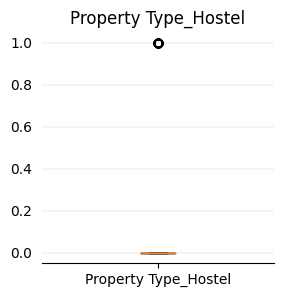

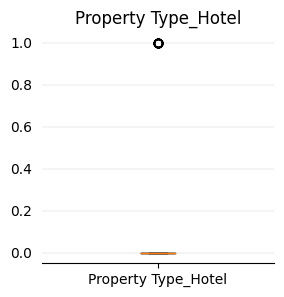

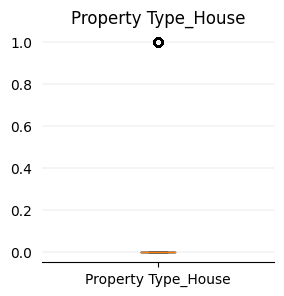

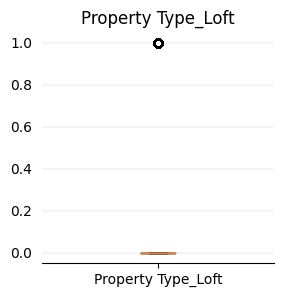

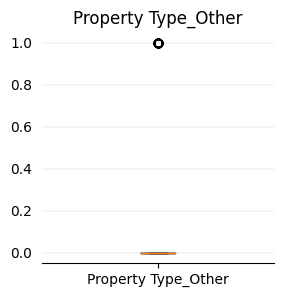

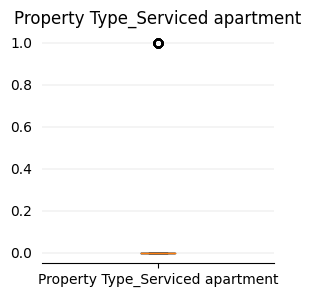

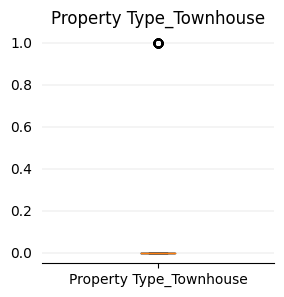

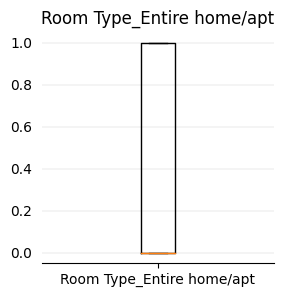

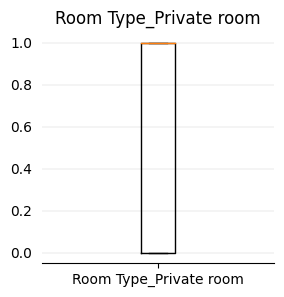

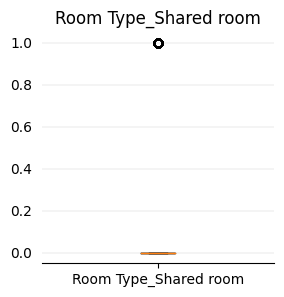

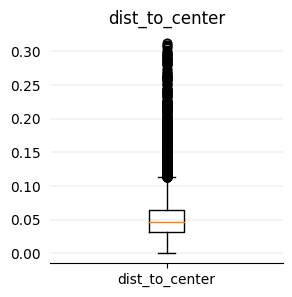

In [83]:
columns = train_airbnb_df_c.columns
for column in columns:
    # Visualize petal length distribution for all species
    fig, ax = plt.subplots(figsize=(3, 3))
    # Remove top and right border
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # Remove y-axis tick marks
    ax.yaxis.set_ticks_position('none')
    # Add major gridlines in the y-axis
    ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
    # Set plot title
    ax.set_title(column)
    ax.boxplot(train_airbnb_df_c[column].dropna().to_numpy(), labels=[column])
    # ax.set_ylim(0, 300)
    plt.show()

In [71]:
train_airbnb_df = pd.read_csv("/Users/cha/Desktop/3A/code/ml-project/data/train_airbnb_berlin_cleaned.csv")
train_airbnb_df

,Host Since,Is Superhost,Is Exact Location,Accomodates,Bathrooms,Bedrooms,Beds,Guests Included,Min Nights,Reviews,...,Property Type_Hotel,Property Type_House,Property Type_Loft,Property Type_Other,Property Type_Serviced apartment,Property Type_Townhouse,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room,dist_to_center
0,2495.0,0.0,1,2.0,1.0,1.0,1.0,1.0,2.0,6,...,0,0,0,0,0,0,0,1,0,0.038108
1,1477.0,0.0,1,2.0,1.0,2.0,2.0,2.0,7.0,6,...,0,0,0,0,0,0,1,0,0,0.057160
2,2513.0,0.0,1,3.0,1.0,1.0,2.0,1.0,1.0,2,...,0,0,0,0,0,0,1,0,0,0.041535
3,3383.0,0.0,1,2.0,1.0,1.0,1.0,1.0,2.0,4,...,0,0,0,0,0,0,0,1,0,0.044069
4,1516.0,1.0,1,3.0,1.0,1.0,2.0,1.0,6.0,0,...,0,0,0,0,0,0,0,1,0,0.021664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15678,1553.0,0.0,1,2.0,1.5,1.0,1.0,1.0,6.0,11,...,0,0,0,0,0,0,0,1,0,0.024770
15679,2219.0,0.0,1,8.0,2.0,3.0,5.0,1.0,1.0,4,...,0,0,0,0,0,0,1,0,0,0.057425
15680,2699.0,0.0,1,2.0,1.5,1.0,1.0,1.0,1.0,0,...,0,0,0,0,0,0,0,1,0,0.072999
15681,2450.0,0.0,1,4.0,1.0,1.0,2.0,2.0,1.0,6,...,0,0,0,0,0,0,1,0,0,0.085326
